In [2]:
class Stock:
    def __init__(self, symbol, name, price, quantity):
        self.symbol = symbol
        self.name = name
        self.price = price
        self.quantity = quantity

    def buy(self, quantity):
        self.quantity += quantity

    def sell(self, quantity):
        if self.quantity >= quantity:
            self.quantity -= quantity
            return True
        else:
            return False

    def current_value(self):
        return self.price * self.quantity


class Portfolio:
    def __init__(self):
        self.stocks = []

    def add_stock(self, stock):
        self.stocks.append(stock)

    def remove_stock(self, symbol):
        for stock in self.stocks:
            if stock.symbol == symbol:
                self.stocks.remove(stock)
                return True
        return False

    def total_value(self):
        total = 0
        for stock in self.stocks:
            total += stock.current_value()
        return total

    def view_portfolio(self):
        for stock in self.stocks:
            print(f"{stock.name} ({stock.symbol}): {stock.quantity} shares")


class Transaction:
    @staticmethod
    def buy_stock(portfolio, symbol, name, price, quantity):
        stock = Stock(symbol, name, price, quantity)
        portfolio.add_stock(stock)

    @staticmethod
    def sell_stock(portfolio, symbol, quantity):
        for stock in portfolio.stocks:
            if stock.symbol == symbol:
                if stock.sell(quantity):
                    if stock.quantity == 0:
                        portfolio.remove_stock(symbol)
                    return True
                else:
                    return False
        return False


def main():
    my_portfolio = Portfolio()

    # Simulating some transactions
    Transaction.buy_stock(my_portfolio, "AAPL", "Apple Inc.", 150, 10)
    Transaction.buy_stock(my_portfolio, "GOOGL", "Alphabet Inc.", 2500, 5)
    Transaction.sell_stock(my_portfolio, "AAPL", 3)

    # Viewing portfolio and total value
    my_portfolio.view_portfolio()
    print("Total Portfolio Value:", my_portfolio.total_value())


if __name__ == "__main__":
    main()


Apple Inc. (AAPL): 7 shares
Alphabet Inc. (GOOGL): 5 shares
Total Portfolio Value: 13550


In [ ]:
'Adding stocks to their portfolio, view their current holdings, and update the number of shares they own'

In [3]:
import json

class Stock:
    def __init__(self, symbol, name, shares, price):
        self.symbol = symbol
        self.name = name
        self.shares = shares
        self.price = price

    def to_dict(self):
        return {
            "symbol": self.symbol,
            "name": self.name,
            "shares": self.shares,
            "price": self.price
        }

class Portfolio:
    def __init__(self, filename):
        self.filename = filename
        self.stocks = self.load_portfolio()

    def load_portfolio(self):
        try:
            with open(self.filename, 'r') as file:
                stocks_data = json.load(file)
                stocks = [Stock(stock['symbol'], stock['name'], stock['shares'], stock['price']) for stock in stocks_data]
                return stocks
        except FileNotFoundError:
            return []

    def save_portfolio(self):
        with open(self.filename, 'w') as file:
            stocks_data = [stock.to_dict() for stock in self.stocks]
            json.dump(stocks_data, file, indent=4)

    def add_stock(self, stock):
        self.stocks.append(stock)
        self.save_portfolio()

    def update_shares(self, symbol, new_shares):
        for stock in self.stocks:
            if stock.symbol == symbol:
                stock.shares = new_shares
                self.save_portfolio()
                return True
        return False

    def display_portfolio(self):
        if not self.stocks:
            print("Your portfolio is empty.")
        else:
            print("Your Portfolio:")
            for stock in self.stocks:
                print(f"Symbol: {stock.symbol}, Name: {stock.name}, Shares: {stock.shares}, Price: ${stock.price}")

def main():
    portfolio = Portfolio("portfolio.json")

    while True:
        print("\nStock Portfolio Tracker")
        print("1. Add Stock")
        print("2. Update Shares")
        print("3. View Portfolio")
        print("4. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            symbol = input("Enter the stock symbol: ")
            name = input("Enter the stock name: ")
            shares = int(input("Enter the number of shares: "))
            price = float(input("Enter the price per share: "))
            new_stock = Stock(symbol, name, shares, price)
            portfolio.add_stock(new_stock)
            print("Stock added to portfolio.")

        elif choice == '2':
            symbol = input("Enter the stock symbol you want to update: ")
            new_shares = int(input("Enter the new number of shares: "))
            if portfolio.update_shares(symbol, new_shares):
                print("Shares updated successfully!")
            else:
                print("Stock not found.")

        elif choice == '3':
            portfolio.display_portfolio()

        elif choice == '4':
            print("Exiting...")
            break

        else:
            print("Invalid choice. Please enter a valid option.")

if __name__ == "__main__":
    main()



Stock Portfolio Tracker
1. Add Stock
2. Update Shares
3. View Portfolio
4. Exit
Enter your choice: 4
Exiting...


In [ ]:
'This allows users to manage their stock portfolios by adding, updating, and viewing their current holdings. It provides a practical example of object-oriented programming, file handling, and user interaction'

In [ ]:
'Implementing a feature to calculate the total value of the portfolio based on the current stock prices retrieved from an external API'

In [ ]:

import json

ALPHA_VANTAGE_API_KEY = "YOUR_API_KEY"

class Stock:
    def __init__(self, symbol, name, shares, price):
        self.symbol = symbol
        self.name = name
        self.shares = shares
        self.price = price

    def to_dict(self):
        return {
            "symbol": self.symbol,
            "name": self.name,
            "shares": self.shares,
            "price": self.price
        }

class Portfolio:
    def __init__(self, filename):
        self.filename = filename
        self.stocks = self.load_portfolio()

    def load_portfolio(self):
        try:
            with open(self.filename, 'r') as file:
                stocks_data = json.load(file)
                stocks = [Stock(stock['symbol'], stock['name'], stock['shares'], stock['price']) for stock in stocks_data]
                return stocks
        except FileNotFoundError:
            return []

    def save_portfolio(self):
        with open(self.filename, 'w') as file:
            stocks_data = [stock.to_dict() for stock in self.stocks]
            json.dump(stocks_data, file, indent=4)

    def add_stock(self, stock):
        self.stocks.append(stock)
        self.save_portfolio()

    def update_shares(self, symbol, new_shares):
        for stock in self.stocks:
            if stock.symbol == symbol:
                stock.shares = new_shares
                self.save_portfolio()
                return True
        return False

    def display_portfolio(self):
        if not self.stocks:
            print("Your portfolio is empty.")
        else:
            print("Your Portfolio:")
            for stock in self.stocks:
                print(f"Symbol: {stock.symbol}, Name: {stock.name}, Shares: {stock.shares}, Price: ${stock.price}")

    def calculate_portfolio_value(self):
        total_value = 0
        for stock in self.stocks:
            price = self.get_stock_price(stock.symbol)
            if price is not None:
                stock.price = price
                total_value += price * stock.shares
            else:
                print(f"Failed to fetch price for {stock.symbol}")
        return total_value

    def get_stock_price(self, symbol):
        url = f"https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={symbol}&apikey={ALPHA_VANTAGE_API_KEY}"
        try:
            response = requests.get(url)
            data = response.json()
            price = float(data['Global Quote']['05. price'])
            return price
        except Exception as e:
            print(f"Error fetching price for {symbol}: {e}")
            return None

def main():
    portfolio = Portfolio("portfolio.json")

    while True:
        print("\nStock Portfolio Tracker")
        print("1. Add Stock")
        print("2. Update Shares")
        print("3. View Portfolio")
        print("4. Calculate Portfolio Value")
        print("5. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            symbol = input("Enter the stock symbol: ")
            name = input("Enter the stock name: ")
            shares = int(input("Enter the number of shares: "))
            price = float(input("Enter the price per share: "))
            new_stock = Stock(symbol, name, shares, price)
            portfolio.add_stock(new_stock)
            print("Stock added to portfolio.")

        elif choice == '2':
            symbol = input("Enter the stock symbol you want to update: ")
            new_shares = int(input("Enter the new number of shares: "))
            if portfolio.update_shares(symbol, new_shares):
                print("Shares updated successfully!")
            else:
                print("Stock not found.")

        elif choice == '3':
            portfolio.display_portfolio()

        elif choice == '4':
            total_value = portfolio.calculate_portfolio_value()
            print(f"Total Portfolio Value: ${total_value:.2f}")

        elif choice == '5':
            print("Exiting...")
            break

        else:
            print("Invalid choice. Please enter a valid option.")

if __name__ == "__main__":
    main()



Stock Portfolio Tracker
1. Add Stock
2. Update Shares
3. View Portfolio
4. Calculate Portfolio Value
5. Exit
Enter your choice: 4
Error fetching price for *: '05. price'
Failed to fetch price for *
Total Portfolio Value: $0.00

Stock Portfolio Tracker
1. Add Stock
2. Update Shares
3. View Portfolio
4. Calculate Portfolio Value
5. Exit
Enter your choice: 1
Enter the stock symbol: AMZN
Enter the stock name: AMZN
Enter the number of shares: 10
Enter the price per share: 09
Stock added to portfolio.

Stock Portfolio Tracker
1. Add Stock
2. Update Shares
3. View Portfolio
4. Calculate Portfolio Value
5. Exit
Enter your choice: AMZN
Invalid choice. Please enter a valid option.

Stock Portfolio Tracker
1. Add Stock
2. Update Shares
3. View Portfolio
4. Calculate Portfolio Value
5. Exit
Enter your choice: 3
Your Portfolio:
Symbol: *, Name: Alpa, Shares: 8, Price: $2.0
Symbol: AMZN, Name: AMZN, Shares: 10, Price: $9.0

Stock Portfolio Tracker
1. Add Stock
2. Update Shares
3. View Portfolio
4. 

In [1]:
'The Matplotlib library to plot a simple line graph showing the closing prices of a stock over a period of time.'

'The Matplotlib library to plot a simple line graph showing the closing prices of a stock over a period of time.'

ModuleNotFoundError: No module named 'matplotlib'

Enter the stock symbol: AMZN


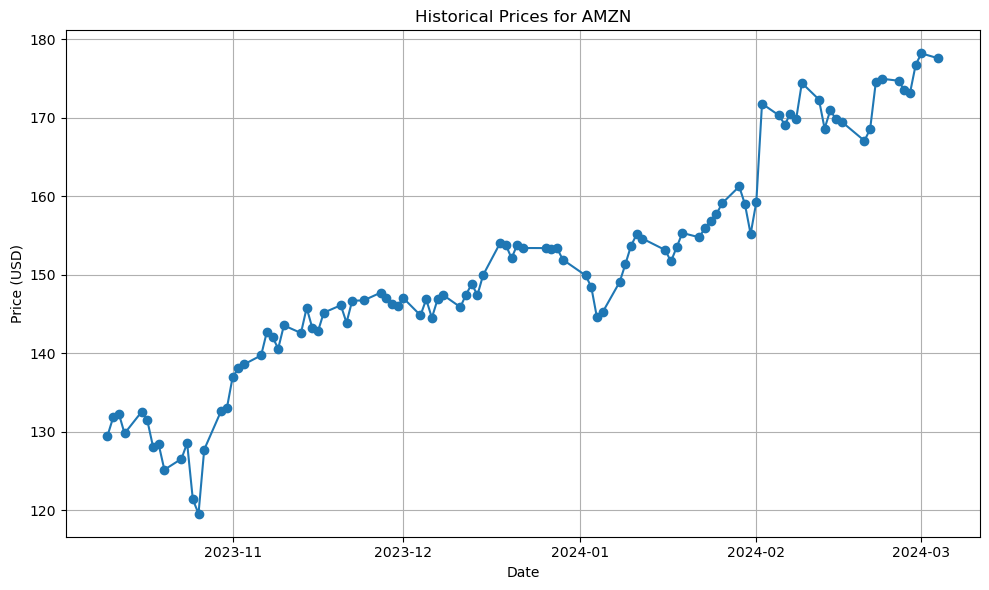

In [2]:
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime

ALPHA_VANTAGE_API_KEY = "YOUR_API_KEY"

class Stock:
    def __init__(self, symbol, name, shares, price):
        self.symbol = symbol
        self.name = name
        self.shares = shares
        self.price = price

    def to_dict(self):
        return {
            "symbol": self.symbol,
            "name": self.name,
            "shares": self.shares,
            "price": self.price
        }

    def get_historical_prices(self):
        url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={self.symbol}&apikey={ALPHA_VANTAGE_API_KEY}"
        try:
            response = requests.get(url)
            data = response.json()['Time Series (Daily)']
            dates = []
            prices = []
            for date_str, price_data in data.items():
                date = datetime.strptime(date_str, "%Y-%m-%d")
                dates.append(date)
                prices.append(float(price_data['4. close']))
            return dates, prices
        except Exception as e:
            print(f"Error fetching historical prices for {self.symbol}: {e}")
            return [], []

def plot_stock_prices(symbol, dates, prices):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, prices, marker='o', linestyle='-')
    plt.title(f"Historical Prices for {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    symbol = input("Enter the stock symbol: ")
    stock = Stock(symbol, "", 0, 0)
    dates, prices = stock.get_historical_prices()
    if dates and prices:
        plot_stock_prices(symbol, dates, prices)
    else:
        print("Failed to fetch historical prices.")

if __name__ == "__main__":
    main()


In [ ]:
'''Here we can enter the symbol of any publicly traded company. For example, you can enter symbols like "AAPL" for Apple Inc., "MSFT" for Microsoft Corporation, "GOOGL" for Alphabet Inc. (Google), "AMZN" for Amazon.com Inc., "TSLA" for Tesla'''